# Modeling the Dynamic Interaction of Hebbian and Homeostatic Plasticity
# Notebook developed by: Awadh Al Hawwash for BME 695
# Edited by: David M Umulis 

*## It is expected from the user to read the published paper [5] before attempting to solve the tasks within this project*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.sparse.linalg
from scipy import sparse
from IPython.display import Image
import math as ma
from IPython.core.display import HTML
from IPython.core.display import Image, display
from scipy.integrate import odeint    # import ODE integrating function

## Introduction and Background 


The ability to learn new skills and keep or lose memory depends on the neural networks’ change and reorganization. Neuroscientists refer to that modification as the neuroplasticity or brain plasticity. The interaction between neurons within neural circuits builds the basis of neuroplasticity through synaptic plasticity. According to Citri and Malenka, synaptic plasticity is defined as “Activity-dependent modification of the strength or efficacy of synaptic transmission…[1].” Neuroscientists have identified several mechanisms and functions of synaptic plasticity, in which all fundamentally agree that synapses are to be stronger or weaker over time [1, 2]. The mechanism of plasticity in general is an alternation of the quantity of neurotransmitters receptors, protein molecules, or enzymes that alter the cellular signaling pathway within synapses, which controls learning and memory processing in the brain [3]. Thus, the activity-dependent efficacy of the synapses might undergo reduction, known as long-term depression (LTD) or experience strength increase known as long-term potentiation (LTP) [4,5]. 


The two major forms of plasticity that have been the subject of many recent studies are Hebbian and homeostatic plasticity [4, 5]. Hebbian plasticity, introduced 1949 by Donald Hebb, is when presynaptic and postsynaptic activities are strong or weak over time, the gain of the synapse follows the strength level of those activity [4, 5]. On the other hand, homeostatic plasticity is a nonspecific excitatory or inhibitory mechanism that scales the overall synaptic strength as shown in figure 1 [4, 5].




<img src="https://drive.google.com/uc?export=view&id=1yEFkiDbfe-JUtqf9D2pertPgZiB4ujas" width=600 height=400 />


**Figure 1:** A schematic diagram shows the relationship between Hebbian and homeostatic plasticity in a behavioral study example. Modified from [6].

When it comes to investigate Hebbian and homeostatic plasticity interaction and dependence, ocular dominance plasticity (ODP) responses in the visual cortex have been the standard subject [5]. Experimentally, there is a critical behavior during and after the monocular deprivation (MD)-closing one eye- that assists scientists to distinguish between Hebbian and homeostatic plasticity responses; especially when blocking one mechanism without the other [5, 6]. The biological process was hypothsized to be a competing process, but in fact it is complex. Hebbian plasticity is characterize by its instability; which is a result of the positive feedback process that derives synaptic strength to be unstable in the absence of other mechanisms [5]. In contrast, the homeostatic plasticity is known to scale the overall synaptic strength or weight to reach equilibrium and stabilize the neural circuits through a negative feedback process [5]. 

During MD, three processes have been identified [5]:
1. The response of the closed eye is getting weaker over MD time and it is mediated by fast Hebbian plasticity. It depends on the calcium entry through N-methyl-D-aspartate (NMDA) receptors acting on calcium calmodulin kinase type II, which makes this process depends on protein synthesis [5].
2. The open eye’s response is getting stronger over the MD time, but it is a slower process and assumed to be mediated by homeostatic scaling. This process can be prevented by blockade of tumor necrosis factor-$\alpha$ (TNF-$\alpha$) [5].
3. Recovery from MD can be prevented by blockade of tropomyosin-related kinase B (TrkB) receptor. TrkB is an essential synapses’ growth factor in neuronal cell culture and plays a role in stabilizing Hebbian LTP [5]. 


Existing mathematical models of synaptic plasticity lack to show the interaction of Hebbian and homeostatic plasticity and there are several controversial theories that require a development of a realistic model that captures the response of ocular dominance [5]. In this project, we are going to implement and analyze three mathematical models that capture the synaptic strength behavior as a function of the Hebbian and homeostatic plasticity parameters. The aim of this exercise is to compare the findings with the published experimental results and comments on the proposed model accuracy. The main results the authors obtained are the sensitivity of the time constants that control each process and the predictions during MD. The authors discussed and implemented a complex methodology to simulate multiple presynaptic neurons with respect to monocular or binocular cortex. The method requires statistical calculation of the variables’ covariance and they made several assumptions to minimize its complexity. Thus, it is also aimed to reproduce their multiple presynaptic model results and investigate those findings. 

# Learning Outcomes

By completing these tasks, the user will be able to:
1. Derive or modify the provided single-synapse models in the form of multi-synaptic models.
2. Simulate the synaptic strength as a function of time with respect to contralateral or ipsilateral eye in monocular and binocular cortex. 
3. Comment on the stability of the single-synapse models. 
4. Critically comment on the models results.

---


# **Model development**
# Modeling Theory 
Modeling the synaptic strength behavior in visual cortices over time is assumed to be an input-output system such that, the post-synaptic output activity $Y$ is the product of the pre-synaptic activity **X** and the synaptic strength **W**, where **W** consists of the LTD and LTP of the Hebbian dynamics and an overall homeostatic plasticity factor. The simple schematic below help to recognizing how the output activity is related to the synaptic strength and the input activity.
\
\begin{equation*}
Y=XW
\end{equation*}


<img src="https://drive.google.com/uc?export=view&id=1hSEPCMm7aQToBdEnqfsyYK0VebZqcTCX" width=800 height=200 />

**Figure 2:** A schematic diagram shows how the synaptic strength consists of Hebbian and homeostatic plasticity factors during modeling.

One of the main assumptions to be made is that during normal vision x=1 while x$<$1 under MD [5]. In order to develop a realistic model, the physiological conditions of the visual cortices synapses need to be considered. Thus, the modeling theory can be classified based on the physiological structure into single-synapse models and multi-synapse models. 

# Single-synapse Models
In the single-synapse models, it is assumed that there is only one input presynaptic activity that produces a single postsynaptic activity in one-synapse model in the monocular cortex [5]. Although it is not physiologically realistic it helps understanding the quantitative measures, tuning the model parameters, and analyzing its stability.  

### **Assumptions:** 
1. The synapses projecting to the monocular cortex are homogeneous
2. The synaptic strength **W** is an average synaptic strength of all inputs activity **X** from contralateral eye to the Lateral geniculate nucleus (LGN)
3. The post-synaptic output activity **Y** is the average activity of monocular cortex

# Multi-synaptic Models
Oppose to the single-synapse models, multi-synaptic models are more realistic as the number of multiple presynaptic neurons is considered. The authors illustrated and assumed several key aspects to account for multiple inputs. 

### **Assumptions:** 

1. They assumed that the postsynaptic activity is the linear sum of all the presynaptic activitys resulting from total number of neurons **N**, such that [5]: 
\begin{equation*}
y=\sum_{i=1}^N x_i w_i
\end{equation*}

2. The postsynaptic neuron receives $N_c$ = $RN$ synapses from the contralateral eye and $N_i$ = $N-N_c$ synapses from the ipsilateral eye. Where **R** is the ratio of contralateral eye neurons.

3. To be more realistic, the authors also included an anatomical strength of axonal arborization when dealing with multiple inputs. This function is $A_i$ which is defined as: 
\begin{equation*}
A_i \propto \frac{1}{1+exp(\frac{3(z_i-0.5)^2}{0.2^2-1})}
\end{equation*}

  where $z_i$ is the parameter used to distinguish the simulation conditions in terms of contralateral or ipsilateral eye and the inputs locations with respect to the retinotopic axis, whether monocular or binocular cortex.  

4. Assuming the inputs are uniformly spaced with N=500, $z_i$ is defined as:

  <li>Monocular cortex</li>
    \begin{equation*}
    z_i=\frac{i-1}{500}
    \end{equation*}
    
  <li>Binocular Cortex</li>
\begin{equation}
z_i=\frac{i-1}{310}
\mbox{        for i = 1:310}
\end{equation}

\begin{equation}
z_i=\frac{i-311}{190}
\mbox{        for i = 311:500}
\end{equation}
        



5. The input statistics include: input firing rate $\mu_{i,j}$, correlation magnitudes between eyes $q_{i,j}$, and input correlation width $\sigma$ in order to generate inputs covariances matrix $\widetilde{Q}_{i,j}$ where: 

\begin{equation*}
\widetilde{Q}_{i,j}=q_{i,j}\langle \mu_i x_i\rangle\langle \mu_j x_j\rangle exp(-\frac{(z_i - z_j)^2}{2\sigma_q^2})
\end{equation*}

6. In order to reproduce more biological heterogeneity to the inputs, a Gaussian random noise was added to the covariance matrix, such that: 
\begin{equation*}
Q_{i,j}=\widetilde{Q}_{i,j} + 2(\xi_i + \xi_j)
\end{equation*}

  where $\xi_{i,j}$ is a Gaussian random noise with a unit variance. 

---

# Model 1: BCM Model 

The most common model that has integrated Hebbian-like and homeostatic plasticity is the Bienenstock-Cooper-Munro (BCM) theory or rule [3, 5]. The theory of this model is based on the correlation between pre and postsynaptic activity (can be a single-synapse or multi-synapse) to predict the synaptic weight behavior over the time of MD. The key difference between this modal and Hebbian theory is that BCM uses a sliding threshold $\theta$– averaged over some period of time- to predict the synaptic weight change [5]. In symbols, the input activity **x** is under LTP if y>$\theta$ and under LTD otherwise. But, $\theta$ is changing with respect to the postsynaptic activity that must be maintained near a set-point activity level, $y_0$. The following equations are used to simulate the synaptic strength **w** to involve Hebbian and homeostatic elements [5]:


\begin{equation*}
\tau_w\frac{dw}{dt}=xy(y-\theta)
\end{equation*}

In the above equation, $\tau_w$ is a time constant that sets the Hebbian learning rate, so the input activity **x** may undergo LTP or LTD

\begin{equation*}
\tau_\theta\frac{d\theta}{dt}=-\theta+y\frac{y}{y_o}
\end{equation*}

The above equation is considered the element involving the homeostatic process, where **$\theta$** is a superlinear function of the average firing rate over a time $\tau_\theta$, such that the postsynaptic activity can be maintained near a set-point activity level, $y_0$.

Consequentially, this model does not capture the MD behavior under the zero activity or when blocking the NMDA receptors to prevent Hebbian plasticity [5] as shown in the preliminary simulation results in figure 3. Moreover, this model does not predict a realistic steady state behavior by reaching a zeros state [5]. 


Parameter | Normal Condition | During MD
---| --- | ---
x | 1.0 | 0.5
$y_o$ | 1.0 | 1.0
$\tau_w$ | xx | xx
$\tau_\theta$ | xx | xx

Variable | Initial Condition
--- | ---
W | 1.0
$\theta$ | 1.0


<img src="https://drive.google.com/uc?export=view&id=1nEeJjD6efUk9luv3opV18_UYdbRTLJwx" width=500 height=250 align=center/>

**Figure 3:** The Synaptic Strength behavior in the Monocular Cortex during MD at Time 0 using the BCM Model [5].

The typical synaptic weight behavior under normal MD conditions should initially decrease due to LTD and subsequently increase. However, as it can be seen from these simple equations, the time constants $\tau_w$ and $\tau_\theta$ play significant role in altering the strength **W**. From figure 3, the ratio of the time constants impacted the synaptic weight behavior $w$. When the ratio is 1, there is a little depression due to the LTD, but it was quickly recovered. This quick change is due to the fast-homeostatic plasticity which was set to be equal to the Hebbian. Thus, in order to allow for a significant initial LTD to occur, the homeostatic plasticity should be sufficiently slower than the Hebbian. However, by slowing down the homeostatic plasticity through increasing the ratio, the synaptic strengths stars to lose stability and shows oscillations. In the results show, the MD was applied at time of 0, with initial conditions that reflect the experimental methods. However, the model does not capture the full behavior and requires homeostatic plasticity to stabilize the Hebbian plasticity, but that trade would result in oscillations.

---



# Task 1 and 2

The following code was written to reproduce the results published in [5] for the BCM model. Given the parameters and initial conditions listed above:
1. Implement the BCM model equations to be solved using odeint in both cases: when $\tau_\theta$$/\tau_w$=1 and $\tau_\theta$$/\tau_w$=3
2. Plot the results of **W** and $\theta$ in the same figure, as shown in figure 3.
3. Reflect on your results by answering the following questions:
    1. What is the main cause of the weight change oscillations, if any ? 
    2. If the time constants were doubled, what other parameters need to be changed to reach the same conclusion?


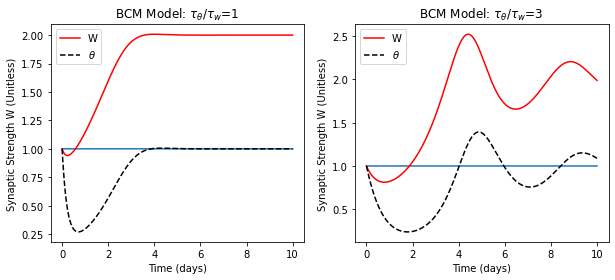

In [ ]:
## Task 1 BCM Model Single in MC

x=0.5   # x = 1 in the normal condition x=0.5 under MD
t_w=0.2  # set the time constant that sets the Hebbian learning rate to 0.2 days 
t_theta=0.2
y_o=1.0

# Iniital Conditions
Init_w=1.0   # initial w strenght
Init_th=1.0  # initial threshold Theta

y0=[Init_w,Init_th]
t=np.linspace(0, 10, 10000)   # Create time array

def BCM(y, t):
    w = y[0]
    theta_ = y[1]

    y_1=w*x # The Y equation to be added here
    dw_dt=(x*y_1*(y_1-theta_))/t_w # dw_dt To be added here 
    dth_dt=(-theta_+y_1*y_1/y_o)/t_theta  # dth_dt To be added here 
    
    return [dw_dt,dth_dt]

# ODE Solution using odeint()
soln  = odeint(BCM, y0, t)
W_sol = soln[:, 0].reshape(-1,1)
thrshold_sol = soln[:, 1].reshape(-1,1)


## Now i change the time canstans 
t_theta =t_theta*3 # set the time constant that sets the Hebbian learning rate to 0.2*3 days 

soln  = odeint(BCM, y0, t)
W_sol = np.concatenate((W_sol, soln[:, 0].reshape(-1,1)), axis=1) 
thrshold_sol = np.concatenate((thrshold_sol, soln[:, 1].reshape(-1,1)), axis=1) 
initial_once = np.ones(len(t))


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(t, initial_once)
plt.plot(t, W_sol[:,0],'r-',label='W')
plt.plot(t, thrshold_sol[:,0],'k--',label=r'$\theta$')
plt.xlabel('Time (days)')
plt.ylabel('Synaptic Strength W (Unitless)')
plt.title(r'BCM Model: $\tau_\theta$/$\tau_w$=1')
plt.legend(loc='best')
plt.subplot(1,2,2)
plt.plot(t, initial_once)
plt.plot(t, W_sol[:,1],'r-',label='W')
plt.plot(t, thrshold_sol[:,1],'k--',label=r'$\theta$')
plt.title(r'BCM Model: $\tau_\theta$/$\tau_w$=3')
plt.xlabel('Time (days)')
plt.ylabel('Synaptic Strength W (Unitless)')
plt.legend(loc='best')






# Task 1 and 2 Answers 
(write down here)

1. The oscillations occurred because **Y** is changing quickly with **W** in the same direction and reaching the set-level value $y_0$ while $\theta$ is slow and averaging the earlier values of **W**. 

2. The time scale of the simulation needs to be doubled as well.  



# Model 2: BCM+Stabilizing Terms

In this model, the authors added stabilizing factors to saturate the strength behavior within a certain range with respect to the experimental findings. They also aimed to show that the BCM does not account for the block of one plasticity than the other. This modification also takes into account the limits at which the LTP and LTD should occur. 

\begin{equation*}
\tau_w\frac{dw}{dt}=[w_{max} - w]_+[xy-\theta]_+ -[w-w_{min}]_+[\theta-xy]_+ +\gamma w(1-\frac{\bar{y}}{y_o})
\end{equation*}

In the above equation, the operation $[x]_+$ means $[x]_+  = x $ only when $x>0$, otherwise $[x]_+ =0$.
\
\
The synaptic strength $w$ is assumed to be modified by the sum of:
1. an LTP term $[w_{max} - w]_+[xy-\theta]_+ $
2. an LTD term $[w-w_{min}]_+[\theta-xy]_+ $
3. a multiplicative homeostatic term $\gamma w(1-\bar{y}/y_o)$ 

The LTP should occur when the product of presynaptic $x$ and postsynaptic activities $y$, is greater than a fixed threshold $\theta$ such that $xy>\theta$ otherwise LTD should occur. At the same time, the LTD and LTP terms should saturate with respect to the weight limited values ($w_{max}$ and $w_{min}$).

The homeostatic term changes the weight $w$ to move the “time-averaged postsynaptic activity” $\bar{y}$ toward a set-point value $y_0$. This term would produce weight change proportional to $w$. The parameter $\gamma$ determines the relativity of homeostasis to Hebbian plasticity strength learning speed [5]. 


\begin{equation*}
\tau_\bar{y} \frac{d\bar{y}}{dt}=-\bar{y}+y
\end{equation*}

Since it is assumed that the threshold limit $\theta$ is fixed, we are considering the “time-averaged postsynaptic activity” $\bar{y}$. In the above equation, it is assumed that the postsynaptic activity is averaged exponentially with time constant $\tau_\bar{y}$ to produce the overall $\bar{y}$, which is directly related to the weight equation.


Parameter | Normal Condition | Strong MD | weaker MD
---| --- | --- | ---
x | 1.0 | 0.5 | 0.73
$y_o$ | 0.8 | 0.8 | 0.8
$\tau_w$ | 0.3 | 0.3 | 0.3
$\tau_\bar{y}$| 3.0 | 3.0 | 3.0
$\theta$ | 0.6 | 0.6 | 0.6 
$w_{max}$ | 1.0 | 1.0 | 1.0 
$w_{min}$ | 0.6 | 0.6 | 0.6 
$\gamma$ | 0.23 | 0.23 | 0.23 


Variable | Initial Condition
--- | ---
W | 0.9
$\bar{y}$ | 0.9


<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0896627314008940-gr2.jpg" width=800 height=200>

**Figure 4:** The Synaptic Strength behavior in the Monocular Cortex during MD after adding stabilizing terms [5].

The simulation results of this modified BCM model with stabilizing terms are partially consistent with the experimental findings; however, the model was too sensitive to the parameters’ selection [5]. In figure 4a, the input activity strength (strength of MD) was $x=0.5$ as a strong MD. The model was able to capture the initial LTD reflected by the initial decrease in $w$, illustrating the fast Hebbian dynamic. Following that, the model also captured the slow homeostatic dynamic by an increase in $w$. This did not hold true when the MD strength was set to a weaker value, $x=0.73$. As shown in figure 4b, the initial LTD was followed by a stable oscillation [5]. 

To test the model validity with the experimental paradigm, the Hebbian dynamic was blocked by setting the LTP and LTD terms to 0 on day 7 mimicking NMDA receptor antagonist in animal models. The simulation result in figure 4c shows that under strong MD, $x=0.5$, the slow homeostatic dynamic was able to derive and upscale the overall synaptic strength. This behavior is due to the fact that the homeostatic dynamic was constitutively active, but not cancelled by the absence of Hebbian dynamic. On the other hand, the experimental findings show no significant change of the visual responses following the NMDA block [5]. 

---


# Task 3 and 4
\
The following code was written to reproduce the results published in [5] for BCM+Stabilizing Terms model. Given the parameters and initial conditions listed above:
1. Implement the model equations to be solved using odeint in both cases: when $x=0.5$ and $x=0.73$
2. Plot the results of $W$ and $\bar{y}$ in the same figure, as shown in figure 4a,b.
3. Plot the blockade of Hebbian plasticity when $x=0.5$ and when $x=0.3$
4. Reflect on your results by answering the following questions:
    1. How does the MD strength, $x$ value alter the behavior of $w$ during the blockade of Hebbian plasticity?
    2. How the results of this modified model differ from those in BCM model?

---

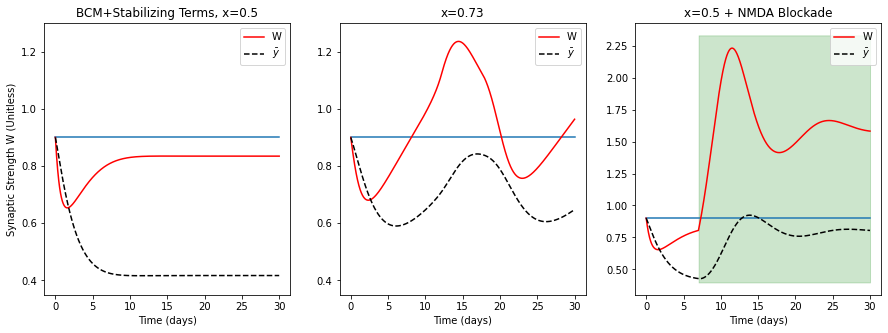

In [ ]:
## Task 3 BCM+Stabilizing Terms

# Parameters for Equation 3
w_max = 1.0
w_min = 0.6
t_w = 0.3 
t_y= 3.0
y_o = 0.8
theta = 0.6
gamma = 0.23 

# Iniital Conditions
Init_w = 0.9   # initial w strenght
Init_yb = 0.9 # initial average postsynaptic activity y-bar
y0=[Init_w,Init_yb]


t=np.linspace(0, 30, 1000)   # Create time array

def TL(x):
    TL_out=x*(x>0);
    return TL_out

    
def BCM_Stable(y, t,flag_NMDA):
    w = y[0]
    dy = y[1]
    y_1=x*w # Needs to be added 
    
    term1=w_max-w
    term2=x*y_1-theta
    term3=w-w_min
    term4=theta-x*y_1
    
    if t>7 and flag_NMDA==1: # ******************************** This if statement needs to be coded  
        NMDA=0
    else:
        NMDA=1


    dw_dt = (NMDA*(TL(term1)*TL(term2)-TL(term3)*TL(term4))+gamma*w*(1-dy/y_o))/t_w # Needs to be added 
    dy_dt = (-dy+y_1)/t_y # Needs to be added 
    
    return [dw_dt,dy_dt]


flag_NMDA=0 # No blockade of Hebbian plasticity
x=0.5
soln  = odeint(BCM_Stable, y0, t,args=(flag_NMDA,))

W_sol = soln[:, 0].reshape(-1,1)
y_b_sol = soln[:, 1].reshape(-1,1)


# Now we change the x to 0.73
x = 0.73
flag_NMDA=0 # No blockade of Hebbian plasticity
soln  = odeint(BCM_Stable, y0, t,args=(flag_NMDA,))
W_sol = np.concatenate((W_sol, soln[:, 0].reshape(-1,1)), axis=1)
y_b_sol = np.concatenate((y_b_sol, soln[:, 1].reshape(-1,1)), axis=1)

# Now we change the x to 0.5  and apply NMDA block
x = 0.5
flag_NMDA=1 # blockade of Hebbian plasticity in on 
soln  = odeint(BCM_Stable, y0, t,args=(flag_NMDA,))
W_sol = np.concatenate((W_sol, soln[:, 0].reshape(-1,1)), axis=1)
y_b_sol = np.concatenate((y_b_sol, soln[:, 1].reshape(-1,1)), axis=1)

initial_once=np.ones(len(t))*0.9
               
               
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(t, initial_once)
plt.plot(t, W_sol[:,0],'r-',label='W')
plt.plot(t, y_b_sol[:,0],'k--',label=r'$\bar{y}$')
plt.xlabel('Time (days)')
plt.ylabel('Synaptic Strength W (Unitless)')
plt.title('BCM+Stabilizing Terms, x=0.5')
plt.legend(loc='best')
plt.ylim((0.35,1.3))
               
plt.subplot(1,3,2)
plt.plot(t, initial_once)
plt.plot(t, W_sol[:,1],'r-',label='W')
plt.plot(t, y_b_sol[:,1],'k--',label=r'$\bar{y}$')
plt.title('x=0.73')
plt.xlabel('Time (days)')
plt.ylim((0.35,1.3))
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.plot(t, initial_once)
plt.plot(t, W_sol[:,2],'r-',label='W')
plt.plot(t, y_b_sol[:,2],'k--',label=r'$\bar{y}$')
plt.title('x=0.5 + NMDA Blockade')
plt.xlabel('Time (days)')
ind1=(t>7.0).nonzero()
#print(ind1[0]) # to read the index when t>7
plt.fill_between(t[234:],y_b_sol[234:,2].ptp()-0.1,W_sol[234:,2].max()+0.1, facecolor="orange", color='green',alpha=0.2) 
#plt.ylim((0,2.6))
plt.legend(loc='best')


# Task 3 and 4 Answers
  

The stronger the value of MD the higher overshot peak of $w$ and longer oscillation. 

In this model, the synaptic strength is limited within a range between w_min and w_max, which maintains non-zero steady state W. In BCM model, the zero state behavior is not physiologically relevant.  

---


# Model 3a: Two-Factor Model Single Synapse 

The two-factor model is proposed in the paper as the solution for the stability and steady state issues of the synaptic strength. The author showed that the model consists mainly of two factors: the Hebbian and homeostatic components and multiplying those two factors should produce the synaptic strength. A synapse-specific Hebbian factor $\rho$ and postsynaptic-cell-specific homeostatic factor $H$. 

\begin{equation*}
w=H\rho
\end{equation*}

\begin{equation*}
\tau_\rho\frac{d\rho}{dt}=(\rho_{max}-\rho)+[xy-\theta]_+ - (\rho-\rho_{min})[\theta-xy]_+
\end{equation*}

\begin{equation*}
\tau_H \frac{dH}{dt}=H(1-\frac{y}{y_o})
\end{equation*}

and solving for $w$
\begin{equation*}
\tau_\rho\frac{dw}{dt}=(H\rho_{max}-w)+[xy-\theta]_+ -(w-H\rho_{min})[\theta-xy]_+ +\frac{\tau_\rho}{\tau_H} w(1-\frac{y}{y_o})
\end{equation*}

As it can be seen from the equations above, there is a limited range of the Hebbian factor that can be reached $\rho_{max}$ and $\rho_{min}$ , which is controlled by the homeostatic factor. It is also critical to notice that the learning speeds of both mechanisms are controlled by the time constants $\tau_\rho$ and $\tau_H$. Differently from all the previous models, the homeostatic factor $H$ depends only on the postsynaptic activity $y$, and not on the synaptic weight $w$.

The authors discussed the physiological relevance of this model in greater details in [5], and mainly that the two-factor model can be addressed in different aspects based on the study objective, as we are going to observe. In the paper, this model was implemented in all forms of simulation: as a single-synapse model, multi-synapse model, in monocular and in Binocular cortex. 


<img src="https://drive.google.com/uc?export=view&id=1dJ6PH-qokabRkh8hq3TN71Rsh5JeQubc" width=500 height=300/>


**Figure 5** The Synaptic Strength behavior in the Monocular Cortex during and after MD using the two-factor model assuming a single synapse input [5].

From figure 5, the proposed two-factor model result shows a prediction of an overshoot following the restoration of normal vision. As it can be seen, the synaptic strength was initially decreased during MD illustrating the Hebbian LTD and followed by a slow homeostatic increase. Although it was assumed that the homeostatic time constant is 40 times slower than the Hebbian time constant, under mild MD the model was able to capture that behavior which was also verified experimentally. The overshot during the recovery was a critical prediction, which was also verified experimentally [5]. Quantitively, the homeostatic factor would impact the synaptic strength to overshoot following the recovery from MD because it depends on post synaptic activity. The immediate recovery from MD would then be purely homeostatic factor dependent, which caused an overshoot of synaptic strength.  


Parameter | Normal Condition | During MD
---| --- | --- 
x | 1.0 | 0.5 
$y_o$ | 1.0 | 1.0 
$\tau_\rho$ | 0.2 | 0.2
$\tau_H$| 8.0 | 8.0 
$\theta$ | 0.6 | 0.6 
$\rho_{max}$ | 1.0 | 1.0 
$\rho_{min}$ | 0.6 | 0.6 


Variable | Initial Condition
--- | ---
W or $\rho$| 1.0
H | 1.0

---



### Task 5

The following code was written to reproduce the results published in [5] for the Two factor model. Given the parameters and initial conditions listed above:

1. Implement the model equations to be solved using odeint in the case where $x=0.5$ when $t<5$ and $x=1$ otherwise.

2. The authors proposed that the $\tau_\rho$ is 40 times faster than $\tau_H$, what does that mean in terms of stable plasticity dynamics. 

3. Does the synaptic strength return to the initial value as the time goes to infinity?

---




Text(0.5, 1.0, 'Two-Factor Model Single Synap')

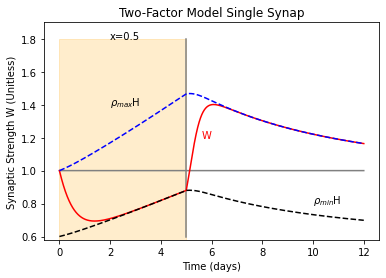

In [ ]:
## Task 5 Two-factor model single-synapse
p_max = 1.0
p_min = 0.6
theta = 0.6
t_p = 0.2
t_h = 8.0
y_o = 1.0

def Tow_Factor_singleS_MainText(y,t):
    P = y[0]
    H = y[1]
    
    def TL(x):
        TL_out=x*(x>0);
        return TL_out

    if t>=5.0:
        x=1.0
    else:
        x=0.5    
    
    dP_dt=((p_max-P)*TL(x*x*P*H-theta)-(P-p_min)*TL(theta-x*x*P*H))/t_p
    dH_dt = (H*(1-x*P*H))/t_h
      
    return [dP_dt,dH_dt]


# Iniital Conditions
x=0.5
P_0=1
H_0=1

y0=[P_0,H_0]
t=np.linspace(0, 12, 10000)   # Create time array
soln=odeint(Tow_Factor_singleS_MainText, y0, t)

# Assigns variable names to solution matrix
P_sol = soln[:, 0]
H_sol = soln[:, 1]
W_sol=P_sol*H_sol

initial_once=np.ones(len(t))

plt.figure()
plt.plot(t,initial_once,'grey')
plt.plot([5,5],[0.6,1.8],'grey')
plt.plot(t, W_sol,'r-')
plt.plot(t,H_sol*p_max,'b--')
plt.plot(t,H_sol*p_min,'k--')
plt.text(2,1.8,'x=0.5')
plt.text(2,1.4,r'$\rho_{max}$H')
plt.text(10,0.8,r'$\rho_{min}$H')
plt.text(5.6,1.2,'W',color='red')
plt.fill_between([0,5],[1.8,1.8], facecolor="orange", color='orange',alpha=0.2) 
plt.ylim((0.58,1.9))
plt.xlabel('Time (days)')
plt.ylabel('Synaptic Strength W (Unitless)')
plt.title('Two-Factor Model Single Synap')

# Task 5 Answers

$\tau_\rho$ is 40 times faster than $\tau_H$ which means that the system is stable even if t_H goes to infinity. From the stability analysis in [5], the synaptic weight reaches an overshoot before it converges. 

Yes, as the time goes to infinity, the synaptic weight returns to its pre-MD value and specifically at time of 40 days. 


# Model 3b: Two-Factor Model Multi-synapse 

The two-factor model simulation results predicted the experimental findings with more realistic behavior of the synapse weight.  Thus, it was essential to test the model behavior during the MD of the contralateral eye in the Binocular cortex. The single synapse equations were modified to include multiple inputs statistics while the same concept is held constant. The synapse-specific Hebbian factor $\rho$ was changed to: 


\begin{equation*}
\tau_\rho\frac{d\rho_i}{dt}=(\rho_{max}-\rho_i)+[\phi_i]_+ - (\rho_i-\rho_{min}(H))[-\phi_i]_+
\end{equation*}

where $[\phi_i]_+$ is $Cov[x_i,y]-\theta$ and the $Cov$ is definded as $Q_{i,j}$ in Modeling Theory 

Additionally, the postsynaptic-cell-specific homeostatic factor $H$ was changed to: 

\begin{equation*}
H=Max(h,1)
\end{equation*}

Where $h$ is defined as: 
\begin{equation*}
\tau_h\frac{dh}{dt}=-h+F(H_{target})
\end{equation*}

Where, $F(x)$ is a monotonically increasing function that is 0 for $x \leq 1$ and saturates when $x$ is more than $1$ such that 
\
\begin{equation*}
F(x)=[1+\tanh(x-1)]\Theta(x-1.01)
\end{equation*}

Where $\Theta(x)$ is a step function, $\Theta(x) = 1$ for $x ≥ 0$, and $0$ otherwise. 

The relationships above also modify the synaptic strength to be: 

\begin{equation*}
w_i=HA_i\rho_i
\end{equation*}

Where $A_i$ is the axonal arborization function defined in the Modeling Theory based on the input statistics. 


When it comes to simulate the Binocular cortex, it is also informative to report the Ocular Dominance Index (ODI) with respect to the contralateral and ipsilateral eye in terms of their individual synaptic strengths. Thus, given the above conditions, the ODI was defined as: 
\begin{equation*}
ODI=\frac{C-I}{C+I}
\end{equation*}

Where $C$ and $I$ are the synaptic strenghts $w_i$. 



<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0896627314008940-gr5.jpg"/>

**Figure 6:** The Synaptic Strength behavior and the two-factor multi-synapse varibles change in the Binocular cortex before, during, and after MD [5].

In order to simulate these results, several parameters need to be considered: 

Parameter | Before MD | During MD | Recovery 
---| --- | --- | --- 
x | 1.0 | 0.5 | 1.0
$y_o$ | 1.0 | 1.0 | 1.0
$\tau_\rho$ | 0.2 | 0.2| 0.2
$\tau_H$| 4.0 | 4.0 | 4.0 
$\theta$ | 0.6 | 0.6 | 0.6 
$\rho_{max}$ | 1.0 | 1.0 | 1.0
$\rho_{min}$ | 0.7 | 0.7 | 0.7 



Variable | Initial Condition
--- | ---
$\rho_i$| 1.0 $A_i$
H | 1.0


From figure6, it shows the simulation results of the multi-synapse model in the Binocular cortex before, during, and after MD. As it can be seen, the response of closed eye during MD decreased for a period of time reflecting the Hebbian LTD factor reduction. It was followed by a slower upscaling from the H factor reflecting an overall scaling of weight rather than an individual synaptic-specific factor. This dynamic was verified with the experimental findings and the results show no significant difference [5]. By exploring each of the model’s variables individually, \rho and W show how the contralateral eye inputs stop firing during MD, which resulted in the LTD shown around the indices of C in A and B. By compering these results with the single synapse model in figure 5, the eyes’ responses in D, red = closed eye, blue open eye. This is in agreement with the previous prediction regarding the overshoot during the recovery and the homeostatic overall scaling. 

---


# Task 6

The following code was written to reproduce the results published in [5] for Two-factor multi-synapse model in the Binocular cortex before, during, and after MD. Given the parameters and initial conditions listed above:

1. Implement the model equations to be solved using odeint in the case where there are 500 neurons and a 0.62% ratio of contra-eye neurons are under MD.
2. How significant can the random noise alter the results?


# Task 6.2 Answer

Since the random noise was Gaussian random distribution, it has a negligible effect on the results. By not adding the noise, the results are the same. 


# Task 7
The following code was written to reproduce the results published in [5] for Two-factor multi-synapse model in the Binocular cortex before, during, and after MD. Given the parameters and initial conditions listed above:

1.	Modify the code to simulate the inactivation of the three mechanisms listed in the introduction; Blocking TrK, TNf, and NMDA in order to reproduce the following figure: 

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0896627314008940-gr6.jpg"/>

**Figure 7** The simulation results of the inactivation conditions in the Binocular cortex before, during, and after MD [5].
 
#### Hint: Each inactivation needs to be solved individually. 

# Task 8 
The following code was written to reproduce the results published in [5] for Two-factor multi-synapse model in the Binocular cortex before, during, and after MD. Given the parameters and initial conditions listed above:

1. Modify the code to produce the simulation results in the monocular cortex assuming only contra-eye is only under MD. The expected results should be similar to the published results in figure 8.

<img src="https://drive.google.com/uc?export=view&id=1AB5ECcsR6-GfvR72cGldfWOKp4_A1W6U" width=500 height=500/>

**Figure 8** The simulation results in the monocular cortex before, during, and after MD using 500 inputs from the contralateral eye [5].

---

# Task 6.1 Answer

******ok*******
******ok*******
******ok*******
******ok*******


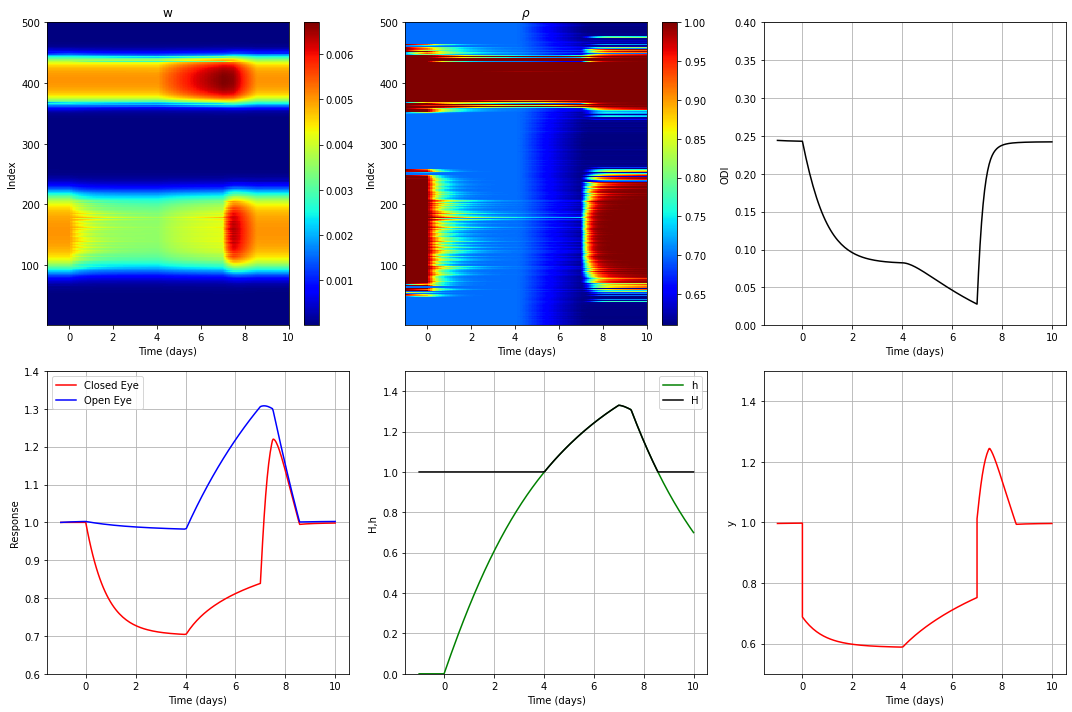

In [ ]:
from matplotlib.colors import LogNorm
# Parameters again 
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.sparse.linalg
from scipy import sparse
from IPython.display import Image
import math as ma
from IPython.core.display import HTML
from IPython.core.display import Image, display
from scipy.integrate import odeint    # import ODE integrating function


rcontra=0.62; # ratio of contra-eye neurons
N_total=500;  # total #neurons 
N_contra=round(rcontra*N_total); # #contra-eye neurons 
N_ipsi=N_total-N_contra; # #ipsi-eye neurons 
Input_mu=1.0; # baseline firing rate
Input_BE=0.5; # between-eye correlation
Input_MD=0.5; # MD factor
Input_L=0.2; # input correlation width

th_corr=0.6; # constant threshold
P_y0=1.0; # homeostatic setpoint
P_rhom=0.7; # minimum value of Hebbian factor
P_rhoM=1.0; # maximum value of Hebbian factor
P_tau_rho=0.2; # Hebbian time-constant (day) 
P_tau_Hh=4.0; # homeostatic hidden averaging time (day) 

T_wu=50; # warm-up (day)  
T_baseline=1.0; # warm-up (day)  
T_MD=7; # MD period (day)  
T_recovery=3.0; # recovery period (day)  

#T_stage=[T_wu,T_baseline,T_MD,T_recovery]
T_stage=[50.0,1.0,7.0,3.0]

flag_trk=1.0;
flag_tnf=1.0;
flag_nmda=1.0;

def Hfun_arr(x):
    
    Hfun_out=np.empty_like(x)
    for i in range(len(x)):
        Hfun_out[i]=np.max([1.0,x[i]])   
    
    return Hfun_out

def Hfun1(x):
    
    Hfun_out1=max(1.0,x)
    return Hfun_out1


def InputStat(MDflag):
    def F(x):
        outF= 1.0/(1.0+np.exp(np.dot(3.0,(x-1.0))))
        return outF
    
    muC=Input_mu*(Input_MD*(MDflag==1.0)+1*(MDflag!=1.0))
    muI=Input_mu*(Input_MD*(MDflag==2.0)+1*(MDflag!=2.0))
    axC=np.linspace(0,1,N_contra).reshape(-1,1);
    axI=np.linspace(0,1,N_ipsi).reshape(-1,1);
    Mu=np.append(muC*np.ones(np.shape(axC)), muI*(np.ones(np.shape(axI)))).reshape(-1,1);
    QCC=(np.power(muC,2.0)*np.exp(-0.5*np.power(OutSub(axC,axC),2.0)/Input_L**2.0))/ma.sqrt(2.0*np.pi*Input_L**2.0);
    QII=(np.power(muI,2.0)*np.exp(-0.5*np.power(OutSub(axI,axI),2.0)/Input_L**2.0))/ma.sqrt(2.0*np.pi*Input_L**2.0);
    QCI=(Input_BE*muC*muI*np.exp(-0.5*np.power(OutSub(axC,axI),2.0)/Input_L**2.0))/ma.sqrt(2.0*np.pi*Input_L**2.0);
    Q=np.concatenate((QCC, QCI), axis=1)
    QCI=np.transpose(QCI)
    Q1=np.concatenate((QCI, QII), axis=1)
    Q=np.concatenate((Q,Q1), axis=0)
    axC=np.power(axC-0.5,2.0);
    axI=np.power(axI-0.5,2.0);
    both=np.append(axC, axI)
    S=F(both/(Input_L**2.0));
    S=S/np.sum(S);
    Nz=np.random.standard_normal([N_total,N_total]); 
    Q=Q+(Nz+np.transpose(Nz));
    S=S.reshape(-1,1)
    Mu=Mu.reshape(-1,1)
    return [Mu,Q,S]
    

      # outer product of the subtraction of two vectors 
def OutSub(In1,In2):
    OuSubOut=In1@np.ones(np.shape(np.transpose(In2)))-np.ones(np.shape(In1))@np.transpose(In2);
    return OuSubOut

def PlastRule(y,t,Mu,Q,S,stages):
        
    y=y.reshape(-1,1)
    rho=y[range(0, N_total)]
    Hh=y[-1];
    
    def Hhfun(x):
        
        out=(1.0+ma.tanh(x-1.0))*(x>1.05)
        return out
    def TL(x):
        TL_out=x*(x>0); #threshold-linear function
        return TL_out
    
    H=Hfun1(Hh)
    
    if Flags[stages][2]==0:
        H=1.0;
   
    w=(H*rho)*S;
    y_1=np.transpose(Mu)@w
    Corr=(Q@w)-th_corr;
    HON=((Flags[stages][3]) or (t<4))
    rr=Flags[stages][1]

    outall=np.zeros(y.shape)
    
    outall[range(0, N_total)]=HON*(rr*(TL(P_rhoM-rho)*TL(Corr))-TL(rho-(P_rhom/ma.sqrt(H)))*TL(-Corr))/P_tau_rho;
    outall[-1]=(-Hh+Hhfun((H*P_y0)/y_1))/P_tau_Hh;
    outall=outall.ravel()
    
    return outall


# simulation the two-factor rule of plasticity
def PlastSim(Init,S,stages):
    def TL(x):
        TL_out=x*(x>0);
        return TL_out

    Init_time1=Init[0]
    Init_rho1=Init[1]
    Init_Hh1=Init[2]
    Init_H1=Init[3]
    sr=100

    Mu,Q,s1=InputStat(Flags[stages][0]); # acquire input statistics
    
    time_vec=Init_time1+np.linspace(0,T_stage[stages],sr)

    print('******ok*******')
    y0=np.append(Init_rho1, Init_Hh1)
    
    
    solo= odeint(PlastRule,y0,time_vec,args=(Mu,Q,S,stages))
    solo=np.transpose(solo)

    
    Hist_rho=solo[range(0, N_total),:]
    Hist_Hh=solo[-1,:]
 
    Hist_time=time_vec
    Hist_H=Hfun_arr(Hist_Hh);



    if Flags[stages][2]==0:
        Hist_H=np.ones(np.shape(Hist_Hh));
        
    Hist_time=Hist_time.reshape(1,-1)
    Hist_H=Hist_H.reshape(1,-1)
    Hist_Hh=Hist_Hh.reshape(1,-1)
        
    Hist_w=Hist_rho*(np.ones([N_total,1])@Hist_H)*(S@np.ones(np.shape(Hist_time)));
    Hist_y=np.transpose(Mu)@Hist_w
    
    W_c_only=np.sum(Hist_w[range(N_contra),:],0)
    W_i_only=np.sum(Hist_w[-N_ipsi:,:],0)

    Hist_resp=[W_c_only,W_i_only]
    Hist_ODI=(W_c_only-W_i_only)/(W_c_only+W_i_only)
    

    
    Hist_ODI=Hist_ODI.reshape(1,-1)
    

    return [Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]

##  *****************************************************************# 


Mu,Q,S=InputStat(0);

Init_time=-T_wu;
V1=np.linspace(1,N_contra,N_contra);
V2=np.linspace(1,N_ipsi,N_ipsi);
V3=(abs(V1-0.5*N_contra)<.25*N_contra)+0
V4=(abs(V2-0.5*N_ipsi<.25*N_ipsi))+0
V5=np.append(V3,V4)
Init_rho=P_rhom+(P_rhoM-P_rhom)*V5


Init_Hh=0.0;
Init_H=1.0;
Init=[Init_time,Init_rho,Init_Hh,Init_H]


stages=[0,1,2,3]; # wp=0 baseline=1 md=2 recovery=3
Flags=[[0.0,1.0,1.0,1.0],[0.0,1.0,flag_tnf,1.0],[1.0,flag_trk,flag_tnf,flag_nmda],[0.0,flag_trk,flag_tnf,1.0]]


[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,0)
Init=[Hist_time[0,-1],Hist_rho[:,-1:],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,1)

allw=Hist_w
all_rho=Hist_rho
all_Hist_H=Hist_H
all_Hist_resp=Hist_resp
all_Hist_ODI=Hist_ODI
all_Hist_Hh=Hist_Hh
all_Hist_time=Hist_time
all_Hist_y=Hist_y

    
Init=[Hist_time[0,-1],Hist_rho[:,-1:],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,2)

allw=np.concatenate((allw, Hist_w), axis=1)
all_rho=np.concatenate((all_rho, Hist_rho), axis=1)
all_Hist_H=np.concatenate((all_Hist_H, Hist_H), axis=1)
all_Hist_resp=np.concatenate((all_Hist_resp,Hist_resp), axis=1)
all_Hist_ODI=np.concatenate((all_Hist_ODI, Hist_ODI), axis=1)
all_Hist_Hh=np.concatenate((all_Hist_Hh, Hist_Hh), axis=1)
all_Hist_time=np.concatenate((all_Hist_time, Hist_time), axis=1)
all_Hist_y=np.concatenate((all_Hist_y, Hist_y), axis=1)

Init=[Hist_time[0,-1],Hist_rho[:,-1:],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,3)
allw=np.concatenate((allw, Hist_w), axis=1)
all_rho=np.concatenate((all_rho, Hist_rho), axis=1)
all_Hist_H=np.concatenate((all_Hist_H, Hist_H), axis=1)
all_Hist_resp=np.concatenate((all_Hist_resp,Hist_resp), axis=1)
all_Hist_ODI=np.concatenate((all_Hist_ODI, Hist_ODI), axis=1)
all_Hist_Hh=np.concatenate((all_Hist_Hh, Hist_Hh), axis=1)
all_Hist_time=np.concatenate((all_Hist_time, Hist_time), axis=1)
all_Hist_y=np.concatenate((all_Hist_y, Hist_y), axis=1)


all_Hist_time=all_Hist_time-1

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.pcolor(all_Hist_time,np.linspace(1,N_total,N_total),allw,cmap='jet')
plt.xlabel('Time (days)')
plt.ylabel('Index')
plt.title('w')
plt.colorbar()
plt.tight_layout()

plt.subplot(2,3,2)
plt.pcolor(all_Hist_time,np.linspace(1,N_total,N_total),all_rho, cmap='jet')
plt.xlabel('Time (days)')
plt.ylabel('Index')
plt.title(r'$\rho$')
plt.colorbar()
plt.tight_layout()


plt.subplot(2,3,3)
plt.plot(all_Hist_time.ravel(),all_Hist_ODI.ravel(),'k')
plt.ylabel('ODI')
plt.xlabel('Time (days)')
plt.ylim((0,0.4))
plt.grid()



plt.subplot(2,3,4)
plt.plot(all_Hist_time.ravel(),(all_Hist_resp[0,:]/all_Hist_resp[0,0]),'r',label='Closed Eye')
plt.plot(all_Hist_time.ravel(),(all_Hist_resp[1,:]/all_Hist_resp[1,0]),'b', label='Open Eye')
plt.ylabel('Response')
plt.xlabel('Time (days)')
plt.ylim((0.6,1.4))
plt.grid()
plt.legend(loc='best')



plt.subplot(2,3,5)
plt.plot(all_Hist_time.ravel(),all_Hist_Hh.ravel(),'g',label='h')
plt.plot(all_Hist_time.ravel(),all_Hist_H.ravel(),'k',label='H')
plt.ylabel('H,h')
plt.xlabel('Time (days)')
plt.ylim((0,1.5))
plt.grid()
plt.legend(loc='best')

plt.subplot(2,3,6)
plt.plot(all_Hist_time.ravel(),all_Hist_y.ravel(),'r')
plt.ylabel('y')
plt.xlabel('Time (days)')
plt.ylim((0.5,1.5))
plt.tight_layout()
plt.grid()



# Task 7 Answer

******ok*******
******ok*******
******ok*******
******ok*******
******ok*******
******ok*******
******ok*******
******ok*******
******ok*******
******ok*******
TNF= 0
******ok*******
TNF= 0
******ok*******
TNF= 0


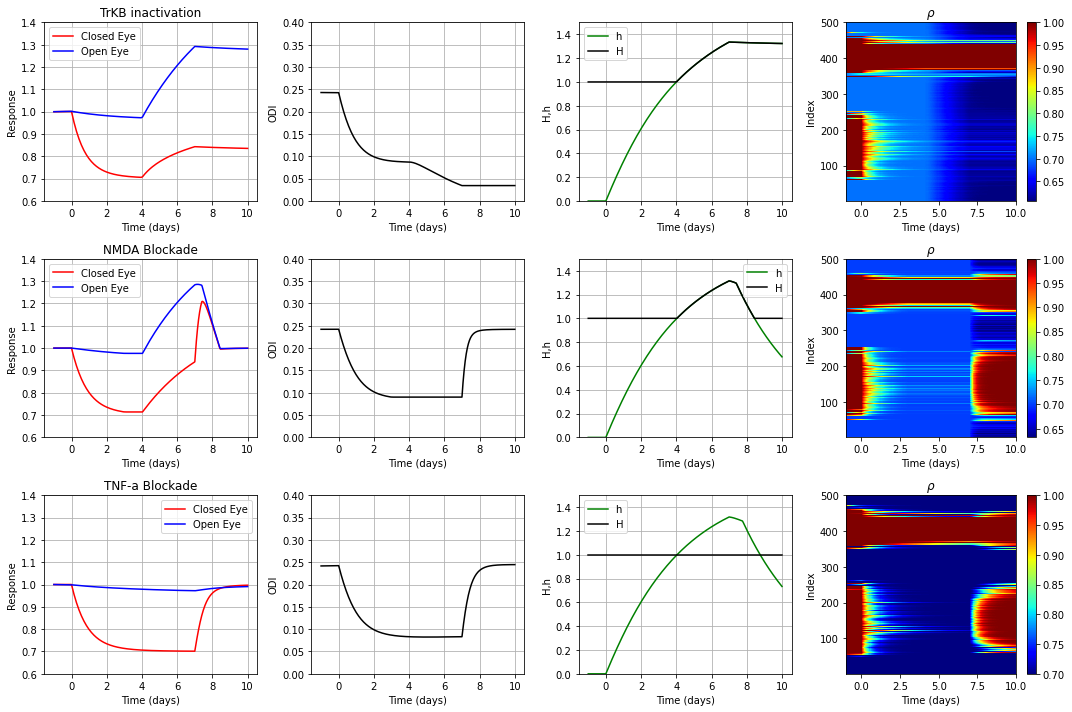

In [ ]:
from matplotlib.colors import LogNorm
# Parameters again 
from IPython.core.debugger import set_trace

import sys
import numpy
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.sparse.linalg
from scipy import sparse
from IPython.display import Image
import math as ma
from IPython.core.display import HTML
from IPython.core.display import Image, display
from scipy.integrate import odeint    # import ODE integrating function





rcontra=0.62; # ratio of contra-eye neurons
N_total=500;  # total #neurons 
N_contra=round(rcontra*N_total); # #contra-eye neurons 
N_ipsi=N_total-N_contra; # #ipsi-eye neurons 
Input_mu=1.; # baseline firing rate
Input_BE=.5; # between-eye correlation
Input_MD=.5; # MD factor
Input_L=.2; # input correlation width

th_corr=.6; # constant threshold
P_y0=1.; # homeostatic setpoint
P_rhom=.7; # minimum value of Hebbian factor
P_rhoM=1.; # maximum value of Hebbian factor
P_tau_rho=.2; # Hebbian time-constant (day) 
P_tau_Hh=4.; # homeostatic hidden averaging time (day) 

T_wu=50; # warm-up (day)  
T_baseline=1; # warm-up (day)  
T_MD=7; # MD period (day)  
T_recovery=3; # recovery period (day)  

#T_stage=[T_wu,T_baseline,T_MD,T_recovery]
T_stage=[50,1,7,3]


def Hfun(x):
    
    Hfun_out=np.empty_like(x)
    for i in range(len(x)):
        Hfun_out[i]=np.max([1,x[i]])   
    
    return Hfun_out

def Hfun1(x):
    
    Hfun_out1=max(1,x)
    return Hfun_out1


def InputStat(MDflag):
    def F(x):
        outF= 1./(1+np.exp(np.dot(3,(x-1))))
        return outF
    
    muC=Input_mu*(Input_MD*(MDflag==1)+1*(MDflag!=1));
    muI=Input_mu*(Input_MD*(MDflag==2)+1*(MDflag!=2));
    
    axC=np.linspace(0,1,N_contra).reshape(-1,1);
    axI=np.linspace(0,1,N_ipsi).reshape(-1,1);

    Mu=np.append(muC*np.ones(np.shape(axC)), muI*(np.ones(np.shape(axI)))).reshape(-1,1);
    
    
    QCC=np.power(muC,2)*np.exp(-.5*np.power(OutSub(axC,axC),2)/Input_L**2)/ma.sqrt(2*np.pi*Input_L**2);
    QII=np.power(muI,2)*np.exp(-.5*np.power(OutSub(axI,axI),2)/Input_L**2)/ma.sqrt(2*np.pi*Input_L**2);
    QCI=Input_BE*muC*muI*np.exp(-.5*np.power(OutSub(axC,axI),2)/Input_L**2)/ma.sqrt(2*np.pi*Input_L**2);
    
    
    Q=np.concatenate((QCC, QCI), axis=1)
    QCI=np.transpose(QCI)
    Q1=np.concatenate((QCI, QII), axis=1)
    Q=np.concatenate((Q,Q1), axis=0)
    axC=np.power(axC-0.5,2);
    axI=np.power(axI-0.5,2);
    both=np.append(axC, axI)
    S=F(both/(Input_L**2));
    S=S/np.sum(S);
    Nz=np.random.standard_normal([N_total,N_total]); 


    Q=Q+(Nz+np.transpose(Nz));
    S=S.reshape(-1,1)
    Mu=Mu.reshape(-1,1)
    return [Mu,Q,S]
    

      # outer product of the subtraction of two vectors 
def OutSub(In1,In2):
    
    OuSubOut=In1@np.ones(np.shape(np.transpose(In2)))-np.ones(np.shape(In1))@np.transpose(In2);
    return OuSubOut

#def PlastRule(y,t,Mu,Q,S,stages,i,result):
def PlastRule(y,t,Mu,Q,S,stages):
        
    y=y.reshape(-1,1)
    rho=y[range(0, 500)]
    Hh=y[-1];
    
    def Hhfun(x):
        
        out=(1+np.tanh(x-1))*(x>1.05)
        return out
    def TL(x):
        TL_out=x*(x>0); #threshold-linear function
        return TL_out
    
    H=Hfun1(Hh)
    
    if Flags[stages][2]==0:
        H=1;
   
    w=H*S*rho;
    y_1=np.transpose(Mu)@w
    Corr=Q@w-th_corr;
    HON=((Flags[stages][3]) or (t<4))
    
    rr=Flags[stages][1]

    outall=np.zeros(y.shape)
    
    outall[range(0, 500)]=HON*(rr*TL(P_rhoM-rho)*TL(Corr)-TL(rho-P_rhom/np.sqrt(H))*TL(-Corr))/P_tau_rho;
    outall[-1]=(-Hh+Hhfun(H*P_y0/y_1))/P_tau_Hh;
    outall=outall.ravel()
    
    return outall


# simulation the two-factor rule of plasticity
def PlastSim(Init,S,stages):
    def TL(x):
        TL_out=x*(x>0);
        return TL_out

    Init_time1=Init[0]
    Init_rho1=Init[1]
    Init_Hh1=Init[2]
    Init_H1=Init[3]
    sr=100

    Mu,Q,s1=InputStat(Flags[stages][0]); # acquire input statistics
    
    time_vec=Init_time1+np.linspace(0,T_stage[stages],sr)

    print('******ok*******')
    y0=np.append(Init_rho1, Init_Hh1)
    
    
    solo= odeint(PlastRule,y0,time_vec,args=(Mu,Q,S,stages))
    solo=np.transpose(solo)

    
    Hist_rho=solo[range(0, 500),:]
    Hist_Hh=solo[-1,:]
 
    Hist_time=time_vec[:]
    Hist_H=Hfun(Hist_Hh);



    if Flags[stages][2]==0:
        print('TNF=',Flags[stages][2])
        Hist_H=np.ones(np.shape(Hist_Hh));
        
    Hist_time=Hist_time.reshape(1,-1)
    Hist_H=Hist_H.reshape(1,-1)
    Hist_Hh=Hist_Hh.reshape(1,-1)
    
    #Hist_w=Hist_rho*(np.ones([500,1])*Hist_H)*(S*np.ones(np.shape(Hist_time)));
    
    Hist_w=Hist_rho*(np.ones([500,1])@Hist_H)*(S@np.ones(np.shape(Hist_time)));

    Hist_y=np.transpose(Mu)@Hist_w
    
    W_c_only=np.sum(Hist_w[range(N_contra),:],0)
    W_i_only=np.sum(Hist_w[-N_ipsi:,:],0)

    Hist_resp=[W_c_only,W_i_only]
    Hist_ODI=(W_c_only-W_i_only)/(W_c_only+W_i_only)
    

    
    Hist_ODI=Hist_ODI.reshape(1,-1)
    

    return [Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]

##  *****************************************************************# 


Mu,Q,S=InputStat(0);

Init_time=-T_wu;
V1=np.linspace(1,N_contra,N_contra);
V2=np.linspace(1,N_ipsi,N_ipsi);
V3=(abs(V1-0.5*N_contra)<.25*N_contra)+0
V4=(abs(V2-0.5*N_ipsi<.25*N_ipsi))+0
V5=np.append(V3,V4)
Init_rho=P_rhom+(P_rhoM-P_rhom)*V5


Init_Hh=0;
Init_H=1;
Init=[Init_time,Init_rho,Init_Hh,Init_H]

flag_trk=0
flag_tnf=1
flag_nmda=1

stages=[0,1,2,3]; # wp=0 baseline=1 md=2 recovery=3
Flags=[[0,1,1,1],[0,1,flag_tnf,1],[1.0,flag_trk,flag_tnf,flag_nmda],[0,flag_trk,flag_tnf,1.0]]



[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,0)
Init=[Hist_time[0,-1],Hist_rho[:,-1],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,1)

allw=(Hist_w)
all_rho=(Hist_rho)
all_Hist_H=(Hist_H)
all_Hist_resp=(Hist_resp)
all_Hist_ODI=(Hist_ODI)
all_Hist_Hh=(Hist_Hh)
all_Hist_time=(Hist_time)
all_Hist_y=(Hist_y)

    
Init=[Hist_time[0,-1],Hist_rho[:,-1],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,2)

allw=np.concatenate((allw, Hist_w), axis=1)
all_rho=np.concatenate((all_rho, Hist_rho), axis=1)
all_Hist_H=np.concatenate((all_Hist_H, Hist_H), axis=1)
all_Hist_resp=np.concatenate((all_Hist_resp,Hist_resp), axis=1)
all_Hist_ODI=np.concatenate((all_Hist_ODI, Hist_ODI), axis=1)
all_Hist_Hh=np.concatenate((all_Hist_Hh, Hist_Hh), axis=1)
all_Hist_time=np.concatenate((all_Hist_time, Hist_time), axis=1)
all_Hist_y=np.concatenate((all_Hist_y, Hist_y), axis=1)

Init=[Hist_time[0,-1],Hist_rho[:,-1],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,3)
allw=np.concatenate((allw, Hist_w), axis=1)
all_rho=np.concatenate((all_rho, Hist_rho), axis=1)
all_Hist_H=np.concatenate((all_Hist_H, Hist_H), axis=1)
all_Hist_resp=np.concatenate((all_Hist_resp,Hist_resp), axis=1)
all_Hist_ODI=np.concatenate((all_Hist_ODI, Hist_ODI), axis=1)
all_Hist_Hh=np.concatenate((all_Hist_Hh, Hist_Hh), axis=1)
all_Hist_time=np.concatenate((all_Hist_time, Hist_time), axis=1)
all_Hist_y=np.concatenate((all_Hist_y, Hist_y), axis=1)


all_Hist_time=all_Hist_time-1



plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
plt.plot(all_Hist_time.ravel(),(all_Hist_resp[0,:]/all_Hist_resp[0,0]),'r',label='Closed Eye')
plt.plot(all_Hist_time.ravel(),(all_Hist_resp[1,:]/all_Hist_resp[1,0]),'b', label='Open Eye')
plt.ylabel('Response')
plt.xlabel('Time (days)')
plt.ylim((0.6,1.4))
plt.grid()
plt.legend(loc='best')
plt.title('TrKB inactivation')



plt.subplot(3,4,2)
plt.plot(all_Hist_time.ravel(),all_Hist_ODI.ravel(),'k')
plt.ylabel('ODI')
plt.xlabel('Time (days)')
plt.ylim((0,0.4))
plt.grid()


plt.subplot(3,4,3)
plt.plot(all_Hist_time.ravel(),all_Hist_Hh.ravel(),'g',label='h')
plt.plot(all_Hist_time.ravel(),all_Hist_H.ravel(),'k',label='H')
plt.ylabel('H,h')
plt.xlabel('Time (days)')
plt.ylim((0,1.5))
plt.grid()
plt.legend(loc='best')



plt.subplot(3,4,4)
plt.pcolor(all_Hist_time,np.linspace(1,500,500),all_rho, cmap='jet')
plt.xlabel('Time (days)')
plt.ylabel('Index')
plt.title(r'$\rho$')
plt.colorbar()
plt.tight_layout()

#********************************************************************
Mu,Q,S=InputStat(0);

Init_time=-T_wu;
V1=np.linspace(1,N_contra,N_contra);
V2=np.linspace(1,N_ipsi,N_ipsi);
V3=(abs(V1-0.5*N_contra)<.25*N_contra)+0
V4=(abs(V2-0.5*N_ipsi<.25*N_ipsi))+0
V5=np.append(V3,V4)
Init_rho=P_rhom+(P_rhoM-P_rhom)*V5


Init_Hh=0;
Init_H=1;
Init=[Init_time,Init_rho,Init_Hh,Init_H]

flag_trk=1
flag_tnf=1
flag_nmda=0

stages=[0,1,2,3]; # wp=0 baseline=1 md=2 recovery=3
Flags=[[0,1,1,1],[0,1,flag_tnf,1],[1.0,flag_trk,flag_tnf,flag_nmda],[0,flag_trk,flag_tnf,1.0]]



[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,0)
Init=[Hist_time[0,-1],Hist_rho[:,-1],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,1)

allw=(Hist_w)
all_rho=(Hist_rho)
all_Hist_H=(Hist_H)
all_Hist_resp=(Hist_resp)
all_Hist_ODI=(Hist_ODI)
all_Hist_Hh=(Hist_Hh)
all_Hist_time=(Hist_time)
all_Hist_y=(Hist_y)

    
Init=[Hist_time[0,-1],Hist_rho[:,-1],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,2)

allw=np.concatenate((allw, Hist_w), axis=1)
all_rho=np.concatenate((all_rho, Hist_rho), axis=1)
all_Hist_H=np.concatenate((all_Hist_H, Hist_H), axis=1)
all_Hist_resp=np.concatenate((all_Hist_resp,Hist_resp), axis=1)
all_Hist_ODI=np.concatenate((all_Hist_ODI, Hist_ODI), axis=1)
all_Hist_Hh=np.concatenate((all_Hist_Hh, Hist_Hh), axis=1)
all_Hist_time=np.concatenate((all_Hist_time, Hist_time), axis=1)
all_Hist_y=np.concatenate((all_Hist_y, Hist_y), axis=1)

Init=[Hist_time[0,-1],Hist_rho[:,-1],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,3)
allw=np.concatenate((allw, Hist_w), axis=1)
all_rho=np.concatenate((all_rho, Hist_rho), axis=1)
all_Hist_H=np.concatenate((all_Hist_H, Hist_H), axis=1)
all_Hist_resp=np.concatenate((all_Hist_resp,Hist_resp), axis=1)
all_Hist_ODI=np.concatenate((all_Hist_ODI, Hist_ODI), axis=1)
all_Hist_Hh=np.concatenate((all_Hist_Hh, Hist_Hh), axis=1)
all_Hist_time=np.concatenate((all_Hist_time, Hist_time), axis=1)
all_Hist_y=np.concatenate((all_Hist_y, Hist_y), axis=1)


all_Hist_time=all_Hist_time-1




plt.subplot(3,4,5)
plt.plot(all_Hist_time.ravel(),(all_Hist_resp[0,:]/all_Hist_resp[0,0]),'r',label='Closed Eye')
plt.plot(all_Hist_time.ravel(),(all_Hist_resp[1,:]/all_Hist_resp[1,0]),'b', label='Open Eye')
plt.ylabel('Response')
plt.xlabel('Time (days)')
plt.ylim((0.6,1.4))
plt.grid()
plt.legend(loc='best')
plt.title('NMDA Blockade')



plt.subplot(3,4,6)
plt.plot(all_Hist_time.ravel(),all_Hist_ODI.ravel(),'k')
plt.ylabel('ODI')
plt.xlabel('Time (days)')
plt.ylim((0,0.4))
plt.grid()


plt.subplot(3,4,7)
plt.plot(all_Hist_time.ravel(),all_Hist_Hh.ravel(),'g',label='h')
plt.plot(all_Hist_time.ravel(),all_Hist_H.ravel(),'k',label='H')
plt.ylabel('H,h')
plt.xlabel('Time (days)')
plt.ylim((0,1.5))
plt.grid()
plt.legend(loc='best')



plt.subplot(3,4,8)
plt.pcolor(all_Hist_time,np.linspace(1,500,500),all_rho, cmap='jet')
plt.xlabel('Time (days)')
plt.ylabel('Index')
plt.title(r'$\rho$')
plt.colorbar()
plt.tight_layout()

#*******************************************************************************

Mu,Q,S=InputStat(0);

Init_time=-T_wu;
V1=np.linspace(1,N_contra,N_contra);
V2=np.linspace(1,N_ipsi,N_ipsi);
V3=(abs(V1-0.5*N_contra)<.25*N_contra)+0
V4=(abs(V2-0.5*N_ipsi<.25*N_ipsi))+0
V5=np.append(V3,V4)
Init_rho=P_rhom+(P_rhoM-P_rhom)*V5


Init_Hh=0;
Init_H=1;
Init=[Init_time,Init_rho,Init_Hh,Init_H]

flag_trk=1
flag_tnf=0
flag_nmda=1

stages=[0,1,2,3]; # wp=0 baseline=1 md=2 recovery=3
Flags=[[0,1,1,1],[0,1,flag_tnf,1],[1.0,flag_trk,flag_tnf,flag_nmda],[0,flag_trk,flag_tnf,1.0]]



[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,0)
Init=[Hist_time[0,-1],Hist_rho[:,-1],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,1)

allw=(Hist_w)
all_rho=(Hist_rho)
all_Hist_H=(Hist_H)
all_Hist_resp=(Hist_resp)
all_Hist_ODI=(Hist_ODI)
all_Hist_Hh=(Hist_Hh)
all_Hist_time=(Hist_time)
all_Hist_y=(Hist_y)

    
Init=[Hist_time[0,-1],Hist_rho[:,-1],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,2)

allw=np.concatenate((allw, Hist_w), axis=1)
all_rho=np.concatenate((all_rho, Hist_rho), axis=1)
all_Hist_H=np.concatenate((all_Hist_H, Hist_H), axis=1)
all_Hist_resp=np.concatenate((all_Hist_resp,Hist_resp), axis=1)
all_Hist_ODI=np.concatenate((all_Hist_ODI, Hist_ODI), axis=1)
all_Hist_Hh=np.concatenate((all_Hist_Hh, Hist_Hh), axis=1)
all_Hist_time=np.concatenate((all_Hist_time, Hist_time), axis=1)
all_Hist_y=np.concatenate((all_Hist_y, Hist_y), axis=1)

Init=[Hist_time[0,-1],Hist_rho[:,-1],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,3)
allw=np.concatenate((allw, Hist_w), axis=1)
all_rho=np.concatenate((all_rho, Hist_rho), axis=1)
all_Hist_H=np.concatenate((all_Hist_H, Hist_H), axis=1)
all_Hist_resp=np.concatenate((all_Hist_resp,Hist_resp), axis=1)
all_Hist_ODI=np.concatenate((all_Hist_ODI, Hist_ODI), axis=1)
all_Hist_Hh=np.concatenate((all_Hist_Hh, Hist_Hh), axis=1)
all_Hist_time=np.concatenate((all_Hist_time, Hist_time), axis=1)
all_Hist_y=np.concatenate((all_Hist_y, Hist_y), axis=1)


all_Hist_time=all_Hist_time-1




#lt.figure(figsize=(12,5))
plt.subplot(3,4,9)
plt.plot(all_Hist_time.ravel(),(all_Hist_resp[0,:]/all_Hist_resp[0,0]),'r',label='Closed Eye')
plt.plot(all_Hist_time.ravel(),(all_Hist_resp[1,:]/all_Hist_resp[1,0]),'b', label='Open Eye')
plt.ylabel('Response')
plt.xlabel('Time (days)')
plt.ylim((0.6,1.4))
plt.grid()
plt.legend(loc='best')
plt.title('TNF-a Blockade')



plt.subplot(3,4,10)
plt.plot(all_Hist_time.ravel(),all_Hist_ODI.ravel(),'k')
plt.ylabel('ODI')
plt.xlabel('Time (days)')
plt.ylim((0,0.4))
plt.grid()


plt.subplot(3,4,11)
plt.plot(all_Hist_time.ravel(),all_Hist_Hh.ravel(),'g',label='h')
plt.plot(all_Hist_time.ravel(),all_Hist_H.ravel(),'k',label='H')
plt.ylabel('H,h')
plt.xlabel('Time (days)')
plt.ylim((0,1.5))
plt.grid()
plt.legend(loc='best')



plt.subplot(3,4,12)
plt.pcolor(all_Hist_time,np.linspace(1,500,500),all_rho, cmap='jet')
plt.xlabel('Time (days)')
plt.ylabel('Index')
plt.title(r'$\rho$')
plt.colorbar()
plt.tight_layout()



# Task 8 Answer

******ok*******
******ok*******
******ok*******
******ok*******


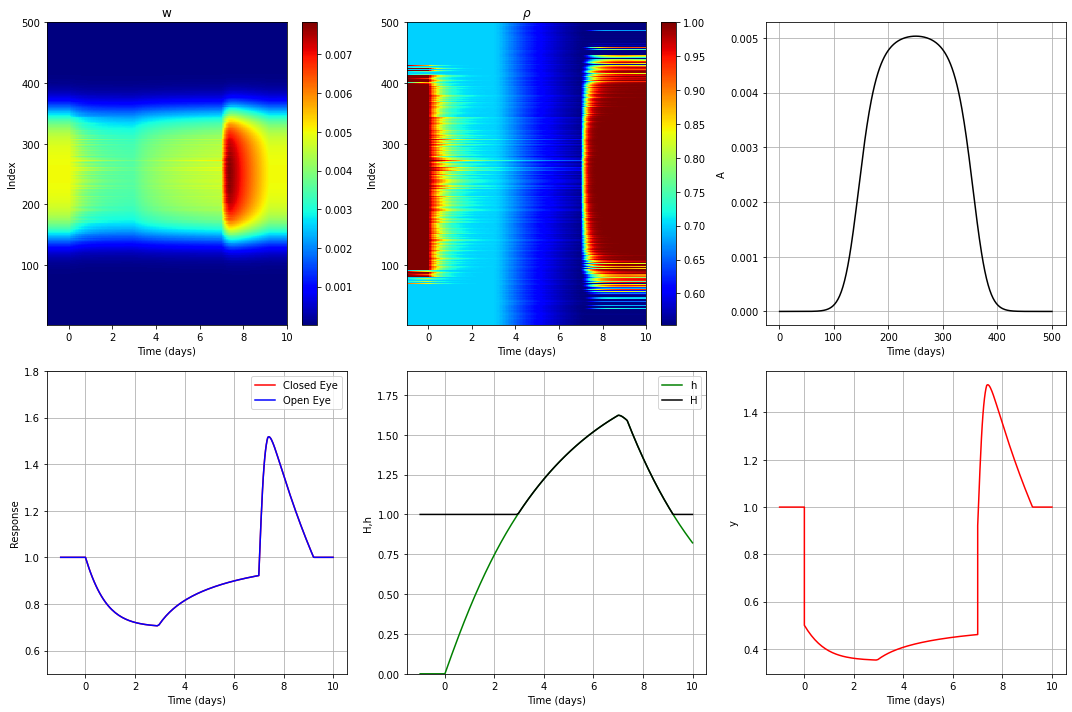

In [ ]:
from matplotlib.colors import LogNorm
# Parameters again 
from IPython.core.debugger import set_trace

import sys
import numpy
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.sparse.linalg
from scipy import sparse
from IPython.display import Image
import math as ma
from IPython.core.display import HTML
from IPython.core.display import Image, display
from scipy.integrate import odeint    # import ODE integrating function

rcontra=1.0; # ratio of contra-eye neurons
N_total=500;  # total #neurons 
N_contra=round(rcontra*N_total); # #contra-eye neurons 
N_ipsi=N_total-N_contra; # #ipsi-eye neurons 
Input_mu=1.; # baseline firing rate
Input_BE=.5; # between-eye correlation
Input_MD=.5; # MD factor
Input_L=.2; # input correlation width

th_corr=.6; # constant threshold
P_y0=1.; # homeostatic setpoint
P_rhom=.7; # minimum value of Hebbian factor
P_rhoM=1.; # maximum value of Hebbian factor
P_tau_rho=.2; # Hebbian time-constant (day) 
P_tau_Hh=4.; # homeostatic hidden averaging time (day) 

T_wu=50; # warm-up (day)  
T_baseline=1; # warm-up (day)  
T_MD=7; # MD period (day)  
T_recovery=3; # recovery period (day)  

#T_stage=[T_wu,T_baseline,T_MD,T_recovery]
T_stage=[50,1,7,3]


def Hfun(x):
    
    Hfun_out=np.empty_like(x)
    for i in range(len(x)):
        Hfun_out[i]=np.max([1,x[i]])   
    
    return Hfun_out

def Hfun1(x):
    
    Hfun_out1=max(1,x)
    return Hfun_out1


def InputStat(MDflag):
    def F(x):
        outF= 1./(1+np.exp(np.dot(3,(x-1))))
        return outF
    
    muC=Input_mu*(Input_MD*(MDflag==1)+1*(MDflag!=1));
    muI=Input_mu*(Input_MD*(MDflag==2)+1*(MDflag!=2));
    
    axC=np.linspace(0,1,N_contra).reshape(-1,1);
    axI=np.linspace(0,1,N_ipsi).reshape(-1,1);

    Mu=np.append(muC*np.ones(np.shape(axC)), muI*(np.ones(np.shape(axI)))).reshape(-1,1);
    
    
    QCC=np.power(muC,2)*np.exp(-.5*np.power(OutSub(axC,axC),2)/Input_L**2)/ma.sqrt(2*np.pi*Input_L**2);
    QII=np.power(muI,2)*np.exp(-.5*np.power(OutSub(axI,axI),2)/Input_L**2)/ma.sqrt(2*np.pi*Input_L**2);
    QCI=Input_BE*muC*muI*np.exp(-.5*np.power(OutSub(axC,axI),2)/Input_L**2)/ma.sqrt(2*np.pi*Input_L**2);
    
    
    Q=np.concatenate((QCC, QCI), axis=1)
    QCI=np.transpose(QCI)
    Q1=np.concatenate((QCI, QII), axis=1)
    Q=np.concatenate((Q,Q1), axis=0)
    axC=np.power(axC-0.5,2);
    axI=np.power(axI-0.5,2);
    both=np.append(axC, axI)
    S=F(both/(Input_L**2));
    S=S/np.sum(S);
    Nz=np.random.standard_normal([N_total,N_total]); 


    Q=Q+(Nz+np.transpose(Nz));
    S=S.reshape(-1,1)
    Mu=Mu.reshape(-1,1)
    return [Mu,Q,S]
    

      # outer product of the subtraction of two vectors 
def OutSub(In1,In2):
    
    OuSubOut=In1@np.ones(np.shape(np.transpose(In2)))-np.ones(np.shape(In1))@np.transpose(In2);
    return OuSubOut

#def PlastRule(y,t,Mu,Q,S,stages,i,result):
def PlastRule(y,t,Mu,Q,S,stages):
        
    y=y.reshape(-1,1)
    rho=y[range(0, 500)]
    Hh=y[-1];
    
    def Hhfun(x):
        
        out=(1+np.tanh(x-1))*(x>1.05)
        return out
    def TL(x):
        TL_out=x*(x>0); #threshold-linear function
        return TL_out
    
    H=Hfun1(Hh)
    
    if Flags[stages][2]==0:
        H=1;
   
    w=H*S*rho;
    y_1=np.transpose(Mu)@w
    Corr=Q@w-th_corr;
    HON=((Flags[stages][3]) or (t<4))
    
    rr=Flags[stages][1]

    outall=np.zeros(y.shape)
    
    outall[range(0, 500)]=HON*(rr*TL(P_rhoM-rho)*TL(Corr)-TL(rho-P_rhom/np.sqrt(H))*TL(-Corr))/P_tau_rho;
    outall[-1]=(-Hh+Hhfun(H*P_y0/y_1))/P_tau_Hh;
    outall=outall.ravel()
    
    return outall


# simulation the two-factor rule of plasticity
def PlastSim(Init,S,stages):
    def TL(x):
        TL_out=x*(x>0);
        return TL_out

    Init_time1=Init[0]
    Init_rho1=Init[1]
    Init_Hh1=Init[2]
    Init_H1=Init[3]
    sr=100

    Mu,Q,s1=InputStat(Flags[stages][0]); # acquire input statistics
    
    time_vec=Init_time1+np.linspace(0,T_stage[stages],sr)

    print('******ok*******')
    y0=np.append(Init_rho1, Init_Hh1)
    
    
    solo= odeint(PlastRule,y0,time_vec,args=(Mu,Q,S,stages))
    solo=np.transpose(solo)

    
    Hist_rho=solo[range(0, 500),:]
    Hist_Hh=solo[-1,:]
 
    Hist_time=time_vec[:]
    Hist_H=Hfun(Hist_Hh);



    if Flags[stages][2]==0:
        print('TNF=',Flags[stages][2])
        Hist_H=np.ones(np.shape(Hist_Hh));
        
    Hist_time=Hist_time.reshape(1,-1)
    Hist_H=Hist_H.reshape(1,-1)
    Hist_Hh=Hist_Hh.reshape(1,-1)
    
    #Hist_w=Hist_rho*(np.ones([500,1])*Hist_H)*(S*np.ones(np.shape(Hist_time)));
    
    Hist_w=Hist_rho*(np.ones([500,1])@Hist_H)*(S@np.ones(np.shape(Hist_time)));

    Hist_y=np.transpose(Mu)@Hist_w
    
    W_c_only=np.sum(Hist_w[range(N_contra),:],0)
    W_i_only=np.sum(Hist_w[-N_ipsi:,:],0)

    Hist_resp=[W_c_only,W_i_only]
    Hist_ODI=(W_c_only-W_i_only)/(W_c_only+W_i_only)
    

    
    Hist_ODI=Hist_ODI.reshape(1,-1)
    

    return [Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]

##  *****************************************************************# 


Mu,Q,S=InputStat(0);

Init_time=-T_wu;
V1=np.linspace(1,N_contra,N_contra);
V2=np.linspace(1,N_ipsi,N_ipsi);
V3=(abs(V1-0.5*N_contra)<.25*N_contra)+0
V4=(abs(V2-0.5*N_ipsi<.25*N_ipsi))+0
V5=np.append(V3,V4)
Init_rho=P_rhom+(P_rhoM-P_rhom)*V5


Init_Hh=0;
Init_H=1;
Init=[Init_time,Init_rho,Init_Hh,Init_H]

flag_trk=1
flag_tnf=1
flag_nmda=1

stages=[0,1,2,3]; # wp=0 baseline=1 md=2 recovery=3
Flags=[[0,1,1,1],[0,1,flag_tnf,1],[1.0,flag_trk,flag_tnf,flag_nmda],[0,flag_trk,flag_tnf,1.0]]



[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,0)
Init=[Hist_time[0,-1],Hist_rho[:,-1],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,1)

allw=(Hist_w)
all_rho=(Hist_rho)
all_Hist_H=(Hist_H)
all_Hist_resp=(Hist_resp)
all_Hist_ODI=(Hist_ODI)
all_Hist_Hh=(Hist_Hh)
all_Hist_time=(Hist_time)
all_Hist_y=(Hist_y)

    
Init=[Hist_time[0,-1],Hist_rho[:,-1],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,2)

allw=np.concatenate((allw, Hist_w), axis=1)
all_rho=np.concatenate((all_rho, Hist_rho), axis=1)
all_Hist_H=np.concatenate((all_Hist_H, Hist_H), axis=1)
all_Hist_resp=np.concatenate((all_Hist_resp,Hist_resp), axis=1)
all_Hist_ODI=np.concatenate((all_Hist_ODI, Hist_ODI), axis=1)
all_Hist_Hh=np.concatenate((all_Hist_Hh, Hist_Hh), axis=1)
all_Hist_time=np.concatenate((all_Hist_time, Hist_time), axis=1)
all_Hist_y=np.concatenate((all_Hist_y, Hist_y), axis=1)

Init=[Hist_time[0,-1],Hist_rho[:,-1],Hist_Hh[0,-1],Hist_H[0,-1]]
[Hist_rho,Hist_H,Hist_w,Hist_resp,Hist_ODI,Hist_Hh,Hist_time,Hist_y]=PlastSim(Init,S,3)
allw=np.concatenate((allw, Hist_w), axis=1)
all_rho=np.concatenate((all_rho, Hist_rho), axis=1)
all_Hist_H=np.concatenate((all_Hist_H, Hist_H), axis=1)
all_Hist_resp=np.concatenate((all_Hist_resp,Hist_resp), axis=1)
all_Hist_ODI=np.concatenate((all_Hist_ODI, Hist_ODI), axis=1)
all_Hist_Hh=np.concatenate((all_Hist_Hh, Hist_Hh), axis=1)
all_Hist_time=np.concatenate((all_Hist_time, Hist_time), axis=1)
all_Hist_y=np.concatenate((all_Hist_y, Hist_y), axis=1)


all_Hist_time=all_Hist_time-1





plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.pcolor(all_Hist_time,np.linspace(1,500,500),allw,cmap='jet')
plt.xlabel('Time (days)')
plt.ylabel('Index')
plt.title('w')
plt.colorbar()
plt.tight_layout()

plt.subplot(2,3,2)
plt.pcolor(all_Hist_time,np.linspace(1,500,500),all_rho, cmap='jet')
plt.xlabel('Time (days)')
plt.ylabel('Index')
plt.title(r'$\rho$')
plt.colorbar()
plt.tight_layout()


plt.subplot(2,3,3)
plt.plot(np.linspace(1,500,500).ravel(),S.ravel(),'k')
plt.ylabel('A')
plt.xlabel('Time (days)')
#plt.ylim((0,0.4))
plt.grid()



plt.subplot(2,3,4)
plt.plot(all_Hist_time.ravel(),(all_Hist_resp[0,:]/all_Hist_resp[0,0]),'r',label='Closed Eye')
plt.plot(all_Hist_time.ravel(),(all_Hist_resp[1,:]/all_Hist_resp[1,0]),'b', label='Open Eye')
plt.ylabel('Response')
plt.xlabel('Time (days)')
plt.ylim((0.5,1.8))
plt.grid()
plt.legend(loc='best')




plt.subplot(2,3,5)
plt.plot(all_Hist_time.ravel(),all_Hist_Hh.ravel(),'g',label='h')
plt.plot(all_Hist_time.ravel(),all_Hist_H.ravel(),'k',label='H')
plt.ylabel('H,h')
plt.xlabel('Time (days)')
plt.ylim((0,1.9))
plt.grid()
plt.legend(loc='best')


plt.subplot(2,3,6)
plt.plot(all_Hist_time.ravel(),all_Hist_y.ravel(),'r')
plt.ylabel('y')
plt.xlabel('Time (days)')
#plt.ylim((0.5,1.5))
plt.tight_layout()
plt.grid()



# List of References
[1]	A. Citri and R. C. Malenka, "Synaptic Plasticity: Multiple Forms, Functions, and Mechanisms," Neuropsychopharmacology, vol. 33, no. 1, pp. 18-41, 2008/01/01 2008, doi: 10.1038/sj.npp.1301559.

[2]	J. Lisman, "Glutamatergic synapses are structurally and biochemically complex because of multiple plasticity processes: long-term potentiation, long-term depression, short-term potentiation and scaling," Philosophical Transactions of the Royal Society B: Biological Sciences, vol. 372, no. 1715, p. 20160260, 2017.

[3]	L. N. Cooper, N. Intrator, B. S. Blais, and H. Z. Shouval, Theory of Cortical Plasticity. WORLD SCIENTIFIC, 2004, p. 332.

[4]	K. Fox and M. Stryker, "Integrating Hebbian and homeostatic plasticity: introduction," ed: The Royal Society, 2017.

[5]	T. Toyoizumi, M. Kaneko, M. P. Stryker, and K. D. Miller, "Modeling the dynamic interaction of Hebbian and homeostatic plasticity," Neuron, vol. 84, no. 2, pp. 497-510, 2014.

[6] J. Li, E. Park, L. R. Zhong, and L. Chen, "Homeostatic synaptic plasticity as a metaplasticity mechanism — a molecular and cellular perspective," Current Opinion in Neurobiology, vol. 54, pp. 44-53, 2019/02/01/ 2019, doi: https://doi.org/10.1016/j.conb.2018.08.010.

[7]	M. Kaneko, D. Stellwagen, R. C. Malenka, and M. P. Stryker, "Tumor necrosis factor-alpha mediates one component of competitive, experience-dependent plasticity in developing visual cortex," (in eng), Neuron, vol. 58, no. 5, pp. 673-680, 2008, doi: 10.1016/j.neuron.2008.04.023.

[8]	G. G. Turrigiano, "The dialectic of Hebb and homeostasis," Philosophical Transactions of the Royal Society B: Biological Sciences, vol. 372, no. 1715, p. 20160258, 2017.

[9]	T. Keck et al., "Integrating Hebbian and homeostatic plasticity: the current state of the field and future research directions," Philosophical Transactions of the Royal Society B: Biological Sciences, vol. 372, no. 1715, p. 20160158, 2017.




So far, this project needs a few more interpretation of the results and I need to show the parameters sensitivity with some figures. The preliminary results from task 1, 3, and 5 matches the published results except the two-factor model result; which appears to be off the scale by a factor of 2. The issue I am facing is the time scale of the parameters versus the simulation sampling time. I should be able to solve that issue by normalizing the time scale. Giving the fact that variables of this model are mostly unitless, consistency might be off with different ODE solvers being used. Additionally, the major missing part is to implement the multi-synapse models and reproduce the paper’s results. The paper has a complex statistical method for that implementation, but never mention some parameters, such as the covariance in the MC. If this model is modified to analyze only single-synapse models, then it can be considered as a sufficient work for the notebook. 

I am dedicating myself to finish this project according to the following chart. 


![](https://drive.google.com/uc?export=view&id=1BixZtRY_jW1p72Pseq1ooXLudr6coGgH)
